# **Perceptron Algorithm**

This notebook provides a complete implementation of the perceptron learning algorithm for binary classification.

1. Generation of linearly separable 2D clusters with Gaussian distributions

2. Online delta rule learning with Heaviside activation with weight updates

3. Decision boundary visualization 2D plots and 3D surface views

4. Accuracy metrics Test set performance evaluation

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(42)

# 1. **Data Generation**
We create a synthetic dataset with two linearly separable classes and we plot the generated data

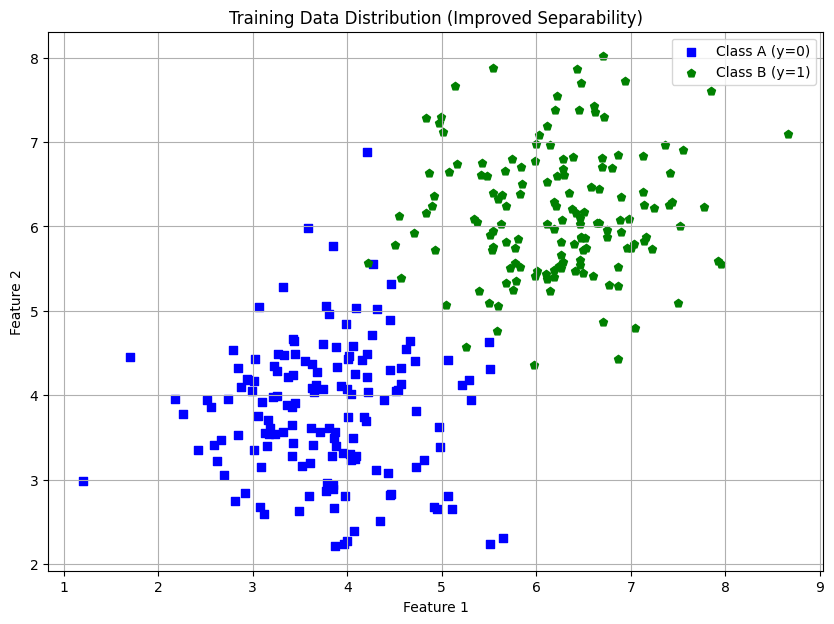

In [17]:
# Parameters for data generation
P = 300  # Number of samples (even number)
distance_from_origin = 1.20
cluster_std = 0.8
offset = 5

# Generate class A (label 0)
class_A = cluster_std * np.random.randn(P//2, 2) + np.array([-distance_from_origin, -distance_from_origin])

# Generate class B (label 1)
class_B = cluster_std * np.random.randn(P//2, 2) + np.array([distance_from_origin, distance_from_origin])

# Combine and shuffle the data
Xtrain = np.vstack((class_A, class_B)) + offset
ytrain = np.hstack((np.zeros(P//2), np.ones(P//2)))

# Shuffle the dataset
shuffled_ind = np.random.permutation(P)
Xtrain = Xtrain[shuffled_ind, :]
ytrain = ytrain[shuffled_ind]

# Add bias term (column of ones) to Xtrain
Xtrain_ext = np.hstack((np.ones((P, 1)), Xtrain))

# Plot the Data
plt.figure(figsize=(10, 7))
plt.scatter(Xtrain[ytrain==0, 0], Xtrain[ytrain==0, 1], c='b', marker='s', label='Class A (y=0)')
plt.scatter(Xtrain[ytrain==1, 0], Xtrain[ytrain==1, 1], c='g', marker='p', label='Class B (y=1)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data Distribution (Improved Separability)')
plt.grid(True)
xlim = plt.xlim()
ylim = plt.ylim()
plt.legend()
plt.show()

# **2. Perceptron Training**

**Activation Function (Heaviside Step Function)**
$$
h(x) = \begin{cases}
1 & \text{if } x > 0 \\
0 & \text{otherwise}
\end{cases}
$$

**Perceptron Output**
$$
\hat{y} = h(\mathbf{w}^T \mathbf{x}) = h\left(\sum_{j=0}^{n} w_j x_j\right)
$$
where:
- $\mathbf{w}$ is the weight vector (including bias)
- $\mathbf{x}$ is the input feature vector (with 1 for the bias term)

**Delta Rule (Weight Update)**
$$
\mathbf{w}^{(t+1)} = \mathbf{w}^{(t)} - \eta (\hat{y} - y) \mathbf{x}
$$
where:
- $\eta$ is the learning rate
- $y$ is the true label (0 or 1)
- $\hat{y}$ is the perceptron's output

**Convergence Criterion**
$$
\|\mathbf{w}^{(t)} - \mathbf{w}^{(t-1)}\| < \epsilon
$$
where $\epsilon$ is the tolerance

In [18]:
def heaviside(x):
    """Heaviside step function (activation function for perceptron).

    Args:
        x: Input value (can be scalar or numpy array)

    Returns:
        1 if x > 0, 0 otherwise
    """
    return (x > 0).astype(np.float32)

def perceptron_train(X, y, w_init, eta, max_iter=10000, tol=1e-4):
    """Train a perceptron using the delta rule.

    Args:
        X: Input features matrix (including bias term)
        y: Target labels (0 or 1)
        w_init: Initial weight vector
        eta: Learning rate
        max_iter: Maximum number of iterations
        tol: Convergence tolerance

    Returns:
        w: Trained weight vector
    """
    w = w_init.copy()
    norm_diff = np.inf
    iteration = 0

    while norm_diff > tol and iteration < max_iter:
        w_old = w.copy()

        # Online learning - update weights for each sample
        for i in range(X.shape[0]):
            hat_y = heaviside(np.dot(X[i,:], w))
            w -= eta * (hat_y - y[i]) * X[i,:]

        # Check convergence
        norm_diff = np.linalg.norm(w_old - w)
        iteration += 1

    return w

## 2.1 Model Training
 Execute training with specified hyperparameters.
- **Learning rate (`eta`):** 0.0001
- **Iterations:** 10000

In [19]:
# Training parameters
eta = 1e-4  # Learning rate
w_init = 2 * np.random.rand(Xtrain_ext.shape[1]) - 1  # Random weights in [-1, 1]

# Train the perceptron
w = perceptron_train(Xtrain_ext, ytrain, w_init, eta)

print("Fitted coefficients w:")
print(w)

Fitted coefficients w:
[-0.02930123  0.00298256  0.00273596]


# **3. Result Visualization**

## 3.1 Decision Boundary Visualization

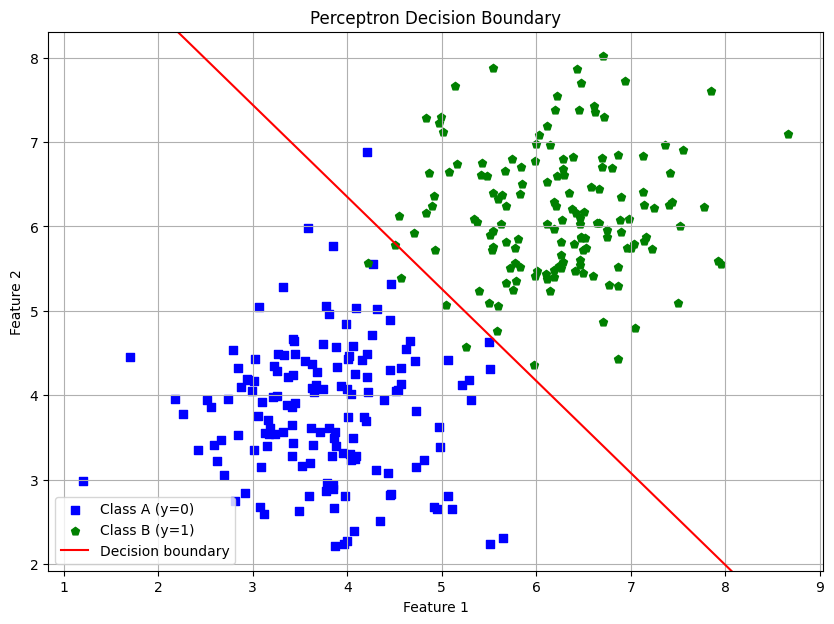

In [20]:
# Recreate the scatter plot
plt.figure(figsize=(10, 7))
plt.scatter(Xtrain[ytrain==0, 0], Xtrain[ytrain==0, 1], c='b', marker='s', label='Class A (y=0)')
plt.scatter(Xtrain[ytrain==1, 0], Xtrain[ytrain==1, 1], c='g', marker='p', label='Class B (y=1)')

# Plot decision boundary (w0 + w1*x1 + w2*x2 = 0)
x1_vals = np.array(xlim)
x2_vals = -(w[0] + w[1] * x1_vals) / w[2]
plt.plot(x1_vals, x2_vals, 'r-', label='Decision boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid(True)
plt.legend()
plt.show()

## 3.2 Surface Plot of Classifier Output

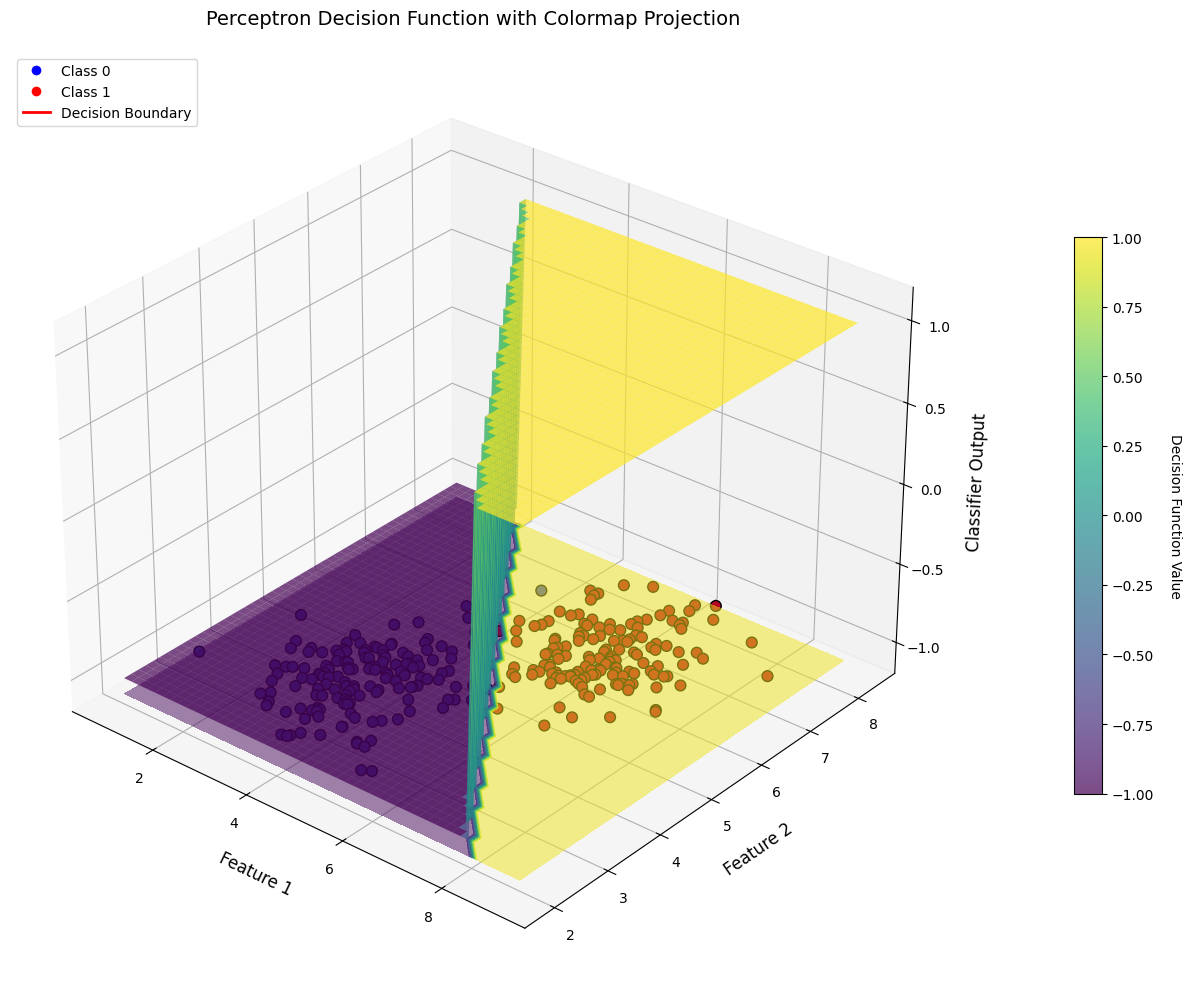

In [21]:
# Create enhanced grid for 3D visualization
np_grid = 50  # Number of points in each dimension
x1_grid, x2_grid = np.meshgrid(np.linspace(xlim[0], xlim[1], np_grid),
                               np.linspace(ylim[0], ylim[1], np_grid))

# Compute classifier output over grid
z_grid = np.sign(w[0] + w[1]*x1_grid + w[2]*x2_grid)

# Create enhanced 3D plot
plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')

# 1. Decision function surface (viridis colormap)
surf = ax.plot_surface(x1_grid, x2_grid, z_grid,
                       cmap='viridis',
                       edgecolor='none',
                       alpha=0.7)

# 2. Add 2D colormap projection at z=-1.1
c = ax.contourf(x1_grid, x2_grid, z_grid,
                zdir='z', offset=-1.1,
                levels=20, cmap='viridis',
                alpha=0.5)

# 3. Add decision boundary at z=0
boundary = ax.contour(x1_grid, x2_grid, z_grid,
                      levels=[0],
                      zdir='z', offset=-1.1,
                      colors='red', linewidths=2)

# 4. Data points at ground level (z=-1)
scatter = ax.scatter(Xtrain[:, 0], Xtrain[:, 1], -1*np.ones(P),
                     c=ytrain, cmap='coolwarm',
                     s=60, edgecolor='k', depthshade=False)

# 5. Labels and styling
ax.set_xlabel('Feature 1', fontsize=12, labelpad=10)
ax.set_ylabel('Feature 2', fontsize=12, labelpad=10)
ax.set_zlabel('Classifier Output', fontsize=12, labelpad=10)
ax.set_title('Perceptron Decision Function with Colormap Projection', fontsize=14, pad=20)
ax.set_zlim(-1.2, 1.2)  # Space for colormap projection

# 6. Colorbar and legend
cbar = plt.colorbar(surf, ax=ax, shrink=0.6, aspect=20, pad=0.1)
cbar.set_label('Decision Function Value', rotation=270, labelpad=20)

# Add legend manually
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=8, label='Class 0'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=8, label='Class 1'),
    plt.Line2D([0], [0], color='red', linewidth=2, label='Decision Boundary')
]
ax.legend(handles=legend_elements, loc='upper left')

# Optimized view
ax.view_init(elev=30, azim=-50)

plt.tight_layout()
plt.show()

# **4. Model Evaluation on Test Set**

In [22]:
# Generate test data with same distribution
P_test = 100  # Number of test samples
class_A_test = np.random.randn(P_test//2, 2) + np.array([-distance_from_origin, -distance_from_origin])
class_B_test = np.random.randn(P_test//2, 2) + np.array([distance_from_origin, distance_from_origin])
Xtest = np.vstack((class_A_test, class_B_test)) + offset
ytest = np.hstack((np.zeros(P_test//2), np.ones(P_test//2)))

# Add bias term and make predictions
Xtest_ext = np.hstack((np.ones((P_test, 1)), Xtest))
predictions = heaviside(Xtest_ext @ w)

# Calculate accuracy
accuracy = np.mean(predictions == ytest)
print(f"Test Accuracy: {accuracy:.2%}")

# Confusion matrix
conf_matrix = np.zeros((2, 2))
conf_matrix[0, 0] = np.sum((predictions == 0) & (ytest == 0))  # True negatives
conf_matrix[0, 1] = np.sum((predictions == 1) & (ytest == 0))  # False positives
conf_matrix[1, 0] = np.sum((predictions == 0) & (ytest == 1))  # False negatives
conf_matrix[1, 1] = np.sum((predictions == 1) & (ytest == 1))  # True positives

print("\nConfusion Matrix:")
print(conf_matrix)

Test Accuracy: 97.00%

Confusion Matrix:
[[48.  2.]
 [ 1. 49.]]
